<a href="https://colab.research.google.com/github/youjinchang/SportAnalysis/blob/main/05_4_HelloSupervisedLearning_AND_Gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Hello Supervisor !
* Simplest Supervised Learning. 분류 문제 풀기
* 05_2_Perceptron와 연계하여 문제를 살펴보면 되겠습니다.

#1.1 Setup

##1.1.1 Loading Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import socket
hostname = socket.gethostname()
print(hostname)

fd3a7f5300f3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt #그래프
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
tf.__version__

'2.7.0'

##1.1.2 데이터 준비하기 (Prepare the data)

In [ ]:
#AND Gate --> OR Gate
x_data = [[0, 0],
[0, 1],
[1, 0],
[1, 1]]
y_data = [[0],
[1],
[1],
[1]]

In [ ]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [ ]:
x_data.shape, y_data.shape

((4, 2), (4, 1))

##1.1.3 학습모델 만들기 (Build the model)

In [ ]:
activation = 'relu' #'sigmoid'

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=2, activation=activation, input_shape=(2,)),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


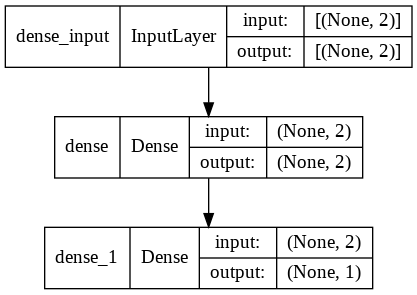

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, dpi=96)

In [ ]:
mode = 1

In [ ]:
if mode ==0:
  loss = 'mean_squared_error'
else:
  loss = 'binary_crossentropy'

In [ ]:
model.compile(loss=loss,
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
batch_size = 1
epochs = 3000

In [ ]:
x_data

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [ ]:
y_data

array([[0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

##1.1.4 학습하기

In [ ]:
history = model.fit(x_data, y_data, batch_size=batch_size, epochs=epochs, verbose = 1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 4ms/step - loss: 0.1963 - binary_accuracy: 1.0000
Epoch 502/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.1961 - binary_accuracy: 1.0000
Epoch 503/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1958 - binary_accuracy: 1.0000
Epoch 504/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1955 - binary_accuracy: 1.0000
Epoch 505/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1952 - binary_accuracy: 1.0000
Epoch 506/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1950 - binary_accuracy: 1.0000
Epoch 507/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1947 - binary_accuracy: 1.0000
Epoch 508/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1944 - binary_accuracy: 1.0000
Epoch 509/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1941 - binary_accuracy: 1.0000
Epoch 510/3000
4

##1.1.5 History 그려보기

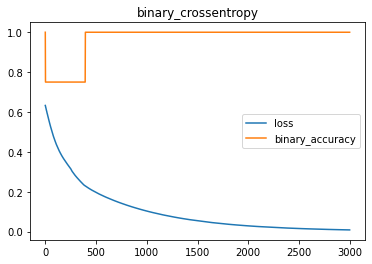

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['binary_accuracy'])
plt.title(loss)
plt.legend(['loss', 'binary_accuracy'])
plt.show()

##1.1.6 Evaluate the trained model

In [ ]:
score = model.evaluate(x_data, y_data, verbose=0)
print("Loss:", score)

Loss: [0.008022024296224117, 1.0]


In [ ]:
model.predict([[0,0]])

array([[0.03131947]], dtype=float32)

In [ ]:
model.predict([[0,1]])

array([[0.99995106]], dtype=float32)

In [ ]:
model.predict([[0,0.9]])

array([[0.9998126]], dtype=float32)

In [ ]:
model.predict([[1,1]])

array([[1.]], dtype=float32)

In [ ]:
model.layers

####1.1.6.1 Weight & Bias

In [ ]:
#Weight1 = model.layers[0].weights[0] #Weight, w1, w2....w8
#Weight2 = model.layers[0].weights[1]
#Weight3 = model.layers[1].weights[0]
#Weight4 = model.layers[1].weights[1]
#Weight1
#Weight2
#Weight3
#Weight4

In [ ]:
Weight1 = model.layers[0].weights[0] #Weight, w1, w2....w8
Weight1

<tf.Variable 'dense_8/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.5917965 ,  1.125426  ],
       [ 0.5564673 ,  0.05833973]], dtype=float32)>

In [ ]:
Weight2 = model.layers[0].weights[1]
Weight2

<tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00062342, -0.05893651], dtype=float32)>

In [ ]:
Weight3 = model.layers[1].weights[0]
Weight3

<tf.Variable 'dense_9/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.0748464 ],
       [-0.76293963]], dtype=float32)>

In [ ]:
Weight4 = model.layers[1].weights[1]
Weight4

<tf.Variable 'dense_9/bias:0' shape=(1,) dtype=float32, numpy=array([0.02780768], dtype=float32)>

In [ ]:
#bias = model.layers[0].weights[1] #bias
#bias

<tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00062342, -0.05893651], dtype=float32)>

In [ ]:
bias1 = model.layers[0].weights[0] #bias
bias

<tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00062342, -0.05893651], dtype=float32)>

In [ ]:
bias2 = model.layers[0].weights[1] #bias
bias

<tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00062342, -0.05893651], dtype=float32)>

In [ ]:
bias3 = model.layers[1].weights[0] #bias
bias

<tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00062342, -0.05893651], dtype=float32)>

In [ ]:
bias4 = model.layers[1].weights[1] #bias
bias

<tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00062342, -0.05893651], dtype=float32)>

##1.1.7 TO DO
* 위는 AND Gate입니다. 완료후 다른 Gate들 (예, OR, NAND, XOR)도 데이터를 만들어서 결과를 확인해주세요
* (Optional) model.layer 속에 들어있는 Weight와 bias 값을 출력해봅시다.

###OR

In [ ]:
#OR

In [ ]:
#OR Gate
x1_data = [[0, 0],
[0, 1],
[1, 0],
[1, 1]]
y1_data = [[0],
[1],
[1],
[1]]

In [ ]:
x1_data = np.array(x_data, dtype=np.float32)
y1_data = np.array(y_data, dtype=np.float32)

In [ ]:
x1_data.shape, y1_data.shape

((4, 2), (4, 1))

In [ ]:
activation = 'relu' #'sigmoid'

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=2, activation=activation, input_shape=(2,)),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


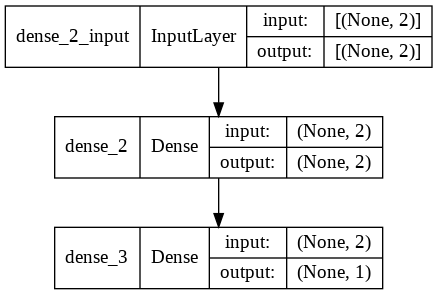

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, dpi=96)

In [ ]:
mode = 1

In [ ]:
if mode ==0:
  loss = 'mean_squared_error'
else:
  loss = 'binary_crossentropy'

In [ ]:
model.compile(loss=loss,
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
batch_size = 1
epochs = 50

In [ ]:
history = model.fit(x1_data, y1_data, batch_size=batch_size, epochs=epochs, verbose = 1)

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 0.6143 - binary_accuracy: 0.7500
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6133 - binary_accuracy: 0.7500
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6113 - binary_accuracy: 0.7500
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6098 - binary_accuracy: 0.7500
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6088 - binary_accuracy: 0.7500
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6074 - binary_accuracy: 0.7500
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6062 - binary_accuracy: 0.7500
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6049 - binary_accuracy: 0.7500
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6036 - binary_accuracy: 0.7500
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.

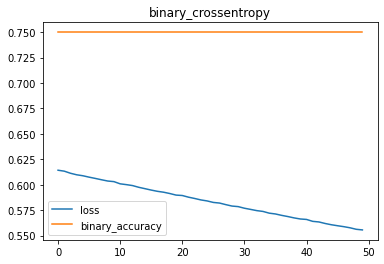

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['binary_accuracy'])
plt.title(loss)
plt.legend(['loss', 'binary_accuracy'])
plt.show()

#### Evaluation

In [ ]:
score = model.evaluate(x1_data, y1_data, verbose=0)
print("Loss:", score)

Loss: [0.5545676946640015, 0.75]


In [ ]:
model.predict([[0,0]])

array([[0.5283054]], dtype=float32)

In [ ]:
model.predict([[0,1]])

array([[0.51961446]], dtype=float32)

In [ ]:
model.predict([[0,0.9]])

array([[0.51961446]], dtype=float32)

In [ ]:
model.predict([[1,1]])

array([[0.60047644]], dtype=float32)

In [ ]:
model.layers

In [ ]:
# Weight = model.layers[0].weights[0] #Weight, w1, w2....w8

In [ ]:
# bias = model.layers[0].weights[1] #bias

###AND

In [ ]:
#AND Gate
x2_data = [[0, 0],
[0, 1],
[1, 0],
[1, 1]]

y2_data = [[0],
[0],
[0],
[1]]

In [ ]:
x2_data = np.array(x2_data, dtype=np.float32)
y2_data = np.array(y2_data, dtype=np.float32)

In [ ]:
x2_data.shape, y2_data.shape

((4, 2), (4, 1))

In [ ]:
activation = 'relu' #'sigmoid'

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=2, activation=activation, input_shape=(2,)),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


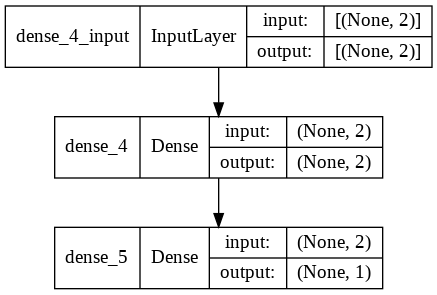

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, dpi=96)

In [ ]:
mode = 1

In [ ]:
if mode ==0:
  loss = 'mean_squared_error'
else:
  loss = 'binary_crossentropy'

In [ ]:
model.compile(loss=loss,
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
batch_size = 1
epochs = 50

In [ ]:
history = model.fit(x2_data, y2_data, batch_size=batch_size, epochs=epochs, verbose = 1)

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 0.7217 - binary_accuracy: 0.7500
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7204 - binary_accuracy: 0.7500
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7187 - binary_accuracy: 0.7500
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7175 - binary_accuracy: 0.7500
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7160 - binary_accuracy: 0.7500
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7146 - binary_accuracy: 0.7500
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7131 - binary_accuracy: 0.7500
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7119 - binary_accuracy: 0.7500
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7104 - binary_accuracy: 0.7500
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.

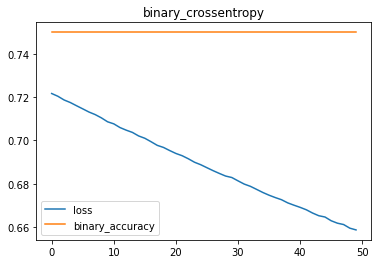

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['binary_accuracy'])
plt.title(loss)
plt.legend(['loss', 'binary_accuracy'])
plt.show()

#### Evaluation

In [ ]:
score = model.evaluate(x2_data, y2_data, verbose=0)
print("Loss:", score)

Loss: [0.657314658164978, 0.75]


In [ ]:
model.predict([[0,0]])

array([[0.4569686]], dtype=float32)

In [ ]:
model.predict([[0,1]])

array([[0.3877301]], dtype=float32)

In [ ]:
model.predict([[0,0.9]])

array([[0.39447144]], dtype=float32)

In [ ]:
model.predict([[1,1]])

array([[0.61068016]], dtype=float32)

In [ ]:
model.layers

In [ ]:
# Weight = model.layers[0].weights[0] #Weight, w1, w2....w8

In [ ]:
# bias = model.layers[0].weights[1] #bias

###NAND

In [ ]:
#NAND

In [ ]:
##NAND Gate
x3_data = [[0, 0],
[0, 1],
[1, 0],
[1, 1]]
y3_data = [[1],
[1],
[1],
[0]]

In [ ]:
x3_data = np.array(x3_data, dtype=np.float32)
y3_data = np.array(y3_data, dtype=np.float32)

In [ ]:
x3_data.shape, y3_data.shape

((4, 2), (4, 1))

In [ ]:
activation = 'relu' #'sigmoid'

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=2, activation=activation, input_shape=(2,)),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


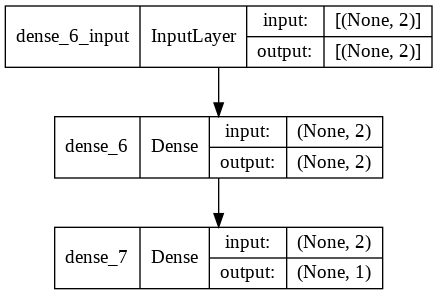

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, dpi=96)

In [ ]:
mode = 1

In [ ]:
if mode ==0:
  loss = 'mean_squared_error'
else:
  loss = 'binary_crossentropy'

In [ ]:
model.compile(loss=loss,
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
batch_size = 1
epochs = 50

In [ ]:
history = model.fit(x3_data, y3_data, batch_size=batch_size, epochs=epochs, verbose = 1)

Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 0.6557 - binary_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6542 - binary_accuracy: 0.7500
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6531 - binary_accuracy: 0.7500
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6508 - binary_accuracy: 0.7500
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6499 - binary_accuracy: 0.7500
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6476 - binary_accuracy: 0.7500
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6458 - binary_accuracy: 0.7500
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6444 - binary_accuracy: 0.7500
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6433 - binary_accuracy: 0.7500
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.

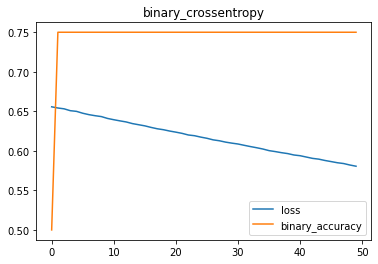

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['binary_accuracy'])
plt.title(loss)
plt.legend(['loss', 'binary_accuracy'])
plt.show()

#### Evaluation

In [ ]:
score = model.evaluate(x3_data, y3_data, verbose=0)
print("Loss:", score)

Loss: [0.5800801515579224, 0.75]


In [ ]:
model.predict([[0,0]])

array([[0.5724637]], dtype=float32)

In [ ]:
model.predict([[0,1]])

array([[0.5217498]], dtype=float32)

In [ ]:
model.predict([[0,0.9]])

array([[0.5217498]], dtype=float32)

In [ ]:
model.predict([[1,1]])

array([[0.5217498]], dtype=float32)

In [ ]:
model.layers

In [ ]:
# Weight = model.layers[0].weights[0] #Weight, w1, w2....w8

In [ ]:
# bias = model.layers[0].weights[1] #bias

###XOR

In [ ]:
#XOR Gate
x4_data = [[0, 0],
[0, 1],
[1, 0],
[1, 1]]
y4_data = [[0],
[1],
[1],
[0]]

In [ ]:
x4_data = np.array(x4_data, dtype=np.float32)
y4_data = np.array(y4_data, dtype=np.float32)

In [ ]:
x4_data.shape, y4_data.shape

((4, 2), (4, 1))

In [ ]:
activation = 'relu' #'sigmoid'

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=2, activation=activation, input_shape=(2,)),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


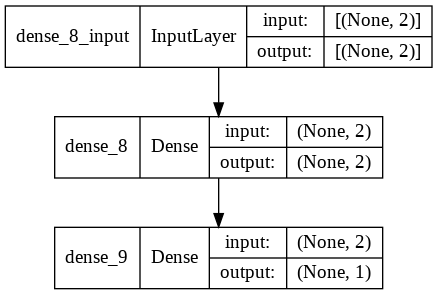

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, dpi=96)

In [ ]:
mode = 1

In [ ]:
if mode ==0:
  loss = 'mean_squared_error'
else:
  loss = 'binary_crossentropy'

In [ ]:
model.compile(loss=loss,
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
batch_size = 1
epochs = 50

In [ ]:
history = model.fit(x4_data, y4_data, batch_size=batch_size, epochs=epochs, verbose = 1)

Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 0.6997 - binary_accuracy: 0.7500
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6990 - binary_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6979 - binary_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6973 - binary_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6964 - binary_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6959 - binary_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6954 - binary_accuracy: 0.5000
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6942 - binary_accuracy: 0.5000
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.6934 - binary_accuracy: 0.5000
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.

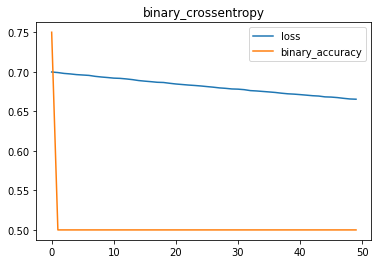

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['binary_accuracy'])
plt.title(loss)
plt.legend(['loss', 'binary_accuracy'])
plt.show()

#### Evaluation

In [ ]:
score = model.evaluate(x4_data, y4_data, verbose=0)
print("Loss:", score)

Loss: [0.6647272109985352, 0.5]


In [ ]:
model.predict([[0,0]])

array([[0.50695145]], dtype=float32)

In [ ]:
model.predict([[0,1]])

array([[0.6514126]], dtype=float32)

In [ ]:
model.predict([[0,0.9]])

array([[0.6377109]], dtype=float32)

In [ ]:
model.predict([[1,1]])

array([[0.30356702]], dtype=float32)

In [ ]:
model.layers

In [ ]:
# Weight = model.layers[0].weights[0] #Weight, w1, w2....w8

In [ ]:
# bias = model.layers[0].weights[1] #bias

###참고

In [ ]:
#05-3_LogisticRegression-keras-lecture.ipynb 참고

In [ ]:
# Weight = model.layers[0].weights[0] #Weight, w1, w2....w8

In [ ]:
# bias = model.layers[0].weights[1] #bias